In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

              Name                                   Current Position  \
0  Anita Durakovič                      Market Analyst at Gen-I d.o.o   
1      Anita Grilc             Business Analyst at Ixtlan Team d.o.o.   
2    Žan Slemenjak  Business Intelligence Team Lead at Sapphir d.o.o.   
3        Simona Š.  Analyst @ University Medical Centre Ljubljana ...   
4  Katja Trebežnik  Researcher at Centre for Social Informatics (F...   

                                        Profile Link  
0  https://www.linkedin.com/in/anita-durakovi%C4%...  
1  https://www.linkedin.com/in/anita-grilc-14395a...  
2  https://www.linkedin.com/in/%C5%BEan-slemenjak...  
3  https://www.linkedin.com/in/simona-%C5%A1-5918...  
4  https://www.linkedin.com/in/katjatrebeznik?min...  


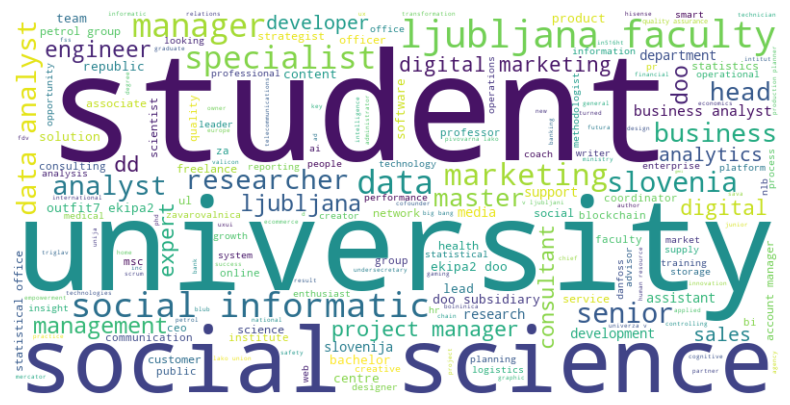

[('at', 171), ('of', 118), ('social', 58), ('student', 47), ('and', 40), ('ljubljana', 39), ('analyst', 38), ('data', 37), ('manager', 36), ('university', 35), ('faculty', 32), ('sciences', 30), ('marketing', 27), ('informatics', 25), ('in', 24), ('doo', 22), ('business', 22), ('specialist', 21), ('digital', 18), ('for', 17)]


In [8]:
# Load the CSV data into a DataFrame
df = pd.read_csv("linkedin_alumni_profiles.csv")

# Display the first few rows of the DataFrame
print(df.head())

def preprocess_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove non-alphanumeric characters (excluding spaces)
        text = re.sub(r'[^a-z0-9\s]', '', text)
        # Remove extra spaces
        text = ' '.join(text.split())
    elif isinstance(text, float):
        # Handle float values
        text = str(text)  # Convert float to string
    return text


# Apply the preprocessing to the 'Current Position' column
df['Current Position'] = df['Current Position'].apply(preprocess_text)

# Combine all the text into a single string
all_text = ' '.join(df['Current Position'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate word frequency
word_counts = Counter(all_text.split())

# Display the most common words
print(word_counts.most_common(20))
